# Coherency and fooof

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io
import scipy.signal

In [3]:
####################################
# apply some settings for plotting #
####################################
mpl.rcParams['axes.labelsize'] = 7
mpl.rcParams['xtick.labelsize'] = 7
mpl.rcParams['ytick.labelsize'] = 7
mpl.rcParams['axes.titlesize'] = 9
color1 = '#e66101'.upper()
color2 = '#5e3c99'.upper()
blind_ax = dict(top=False, bottom=False, left=False, right=False,
        labelleft=False, labelright=False, labeltop=False,
        labelbottom=False)


def calc_csd(x, nperseg, fs=1.0, axis=-1, **kwargs):
    """Calculate the cross-spectral density (csd) of a 2d signal
    Welch's average periodogram technique is used

    Args:
        x (ndarray): a 2d numpy array whose csd is to be calculated
        nperseg (int): the number of datapoints in every segment,
            determines the frequency resolution
        fs (float): the sampling rate
        axis (int): the axis along which the Fourier transform is
            calculated. Defaults to the last axis
        **kwargs: Keyword arguments, as in scipy.signal.welch

    Returns:
        f (ndarray): frequencies corresponding to the result array
        csd (2d ndarray): cross-spectral density of x. The shape will be
            (x.shape[-1-axis], x.shape[-1-axis], len(f))
    """
    if x.ndim != 2:
        raise ValueError('x must be a 2d ndarray')
    if axis != -1:
        x = np.rollaxis(x, axis, len(x.shape))
    idx1, idx2 = np.indices([x.shape[0], x.shape[0]])
    f, csd = scipy.signal.csd(x[idx1], x[idx2], fs=fs,
            nperseg=nperseg, axis=axis, **kwargs)
    return f, csd

def calc_coherence(csd):
    """Calculate the coherence from a csd-mactrix

    Args:
        csd (complex ndarray): matrix of cross-spectral density matrices

    Returns:
        coherence (ndarray): complex valued coherence matrix
    """
    if not csd.shape[0] == csd.shape[1]:
        raise ValueError('csd must be square in the first 2 dimensions')
    ch = csd.shape[0]
    return csd/np.sqrt(csd[range(ch), range(ch),np.newaxis]*
            csd[np.newaxis, range(ch), range(ch)])

## Load Litvak Voxels

In [192]:
#################
# read the data #
#################
f_on_data = '../../data/raw/subj1/on/subj1_on_R7.mat'
f_off_data = '../../data/raw/subj1/off/subj1_off_R7.mat'

on_data = scipy.io.loadmat(f_on_data)['data'][0,0][1][0,0]
on_labels = [i[0][0] for i in scipy.io.loadmat(f_on_data)['data'][0,0][0]]
on_t = scipy.io.loadmat(f_on_data)['data'][0,0][2][0,0][0]

off_data = scipy.io.loadmat(f_off_data)['data'][0,0][1][0,0]
off_labels = [i[0][0] for i in scipy.io.loadmat(f_off_data)['data'][0,0][0]]
off_t = scipy.io.loadmat(f_off_data)['data'][0,0][2][0,0][0]

if np.allclose(np.diff(on_t), np.diff(on_t)[0]):
    on_d = np.diff(on_t)[0]
    on_s_rate = 1./on_d
else:
    raise ValueError('Signal must be evenly sampled')

if np.allclose(np.diff(off_t), np.diff(off_t)[0]):
    off_d = np.diff(off_t)[0]
    off_s_rate = 1./off_d
else:
    raise ValueError('Signal must be evenly sampled')

if not on_labels == off_labels:
    raise ValueError('channel labels must be equal during on and off')

In [193]:
del on_labels[-1] # last entry is event marker

## Visualize Signal:


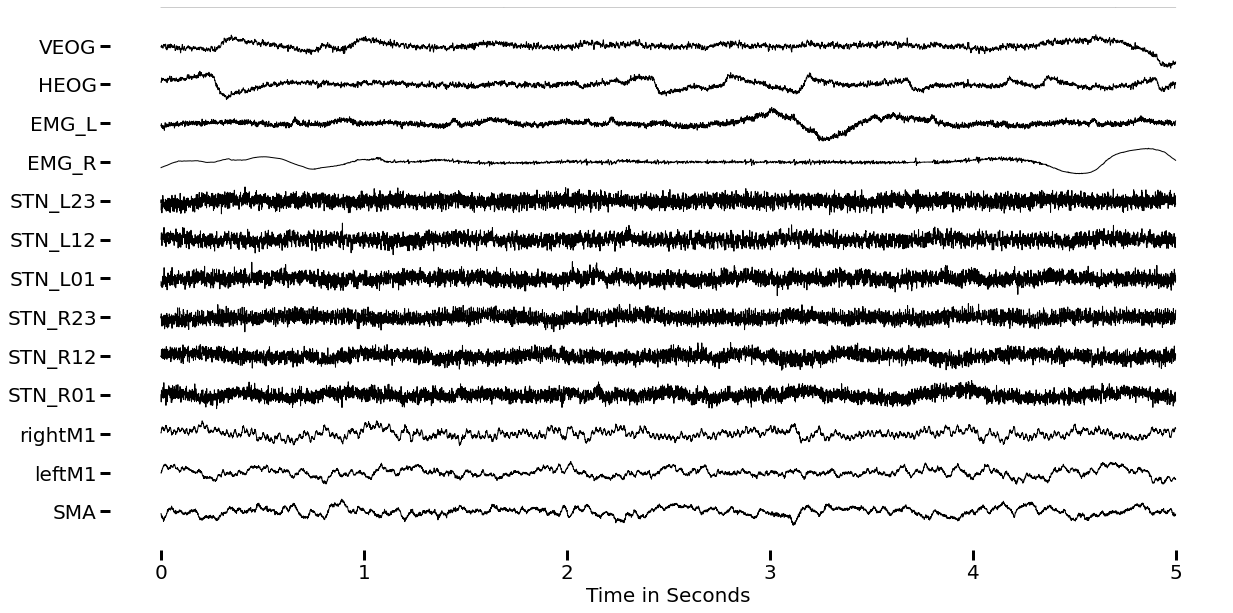

<ipython-input-6-a20ebbb0938b>:28: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(on_t[0:time_lim], on_data[ch, 0:time_lim]/np.std(on_data[ch, 0:time_lim]) + ch*ydiff,


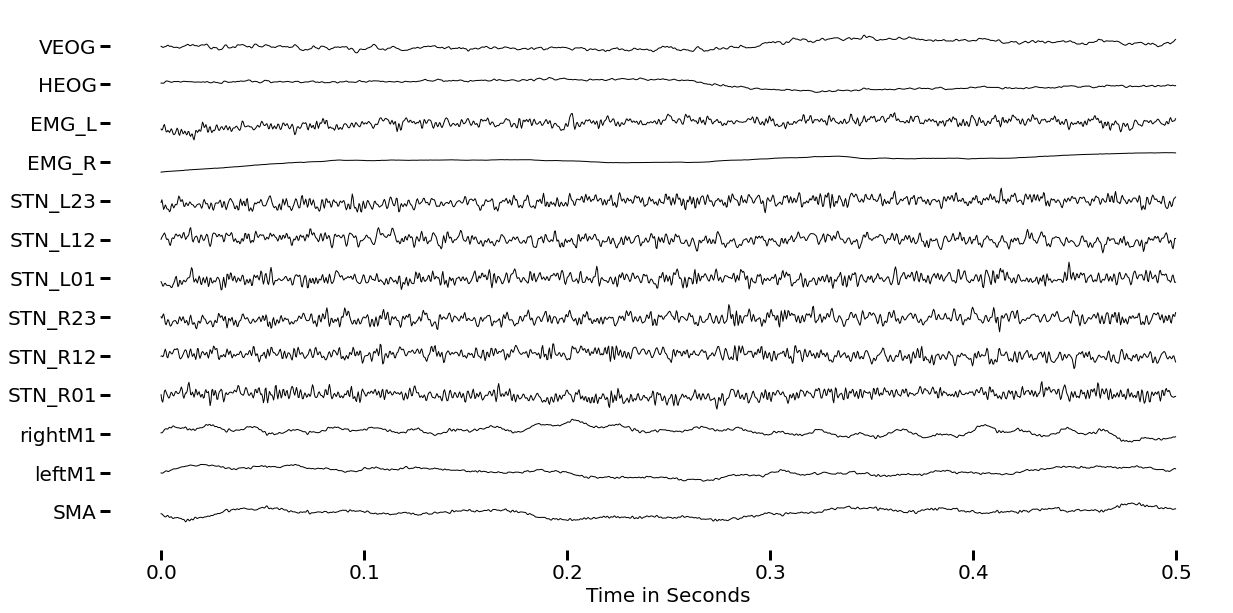

In [6]:
ydiff = 10
fontsize=20

time_lim = int(5*on_s_rate)

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
for ch in range(on_data.shape[0]):
    ax.plot(on_t[0:time_lim], on_data[ch, 0:time_lim]/np.std(on_data[ch, 0:time_lim]) + ch*ydiff,
           c="black", linewidth=1)

ax.set_ylim([-1 * ydiff, len(on_labels) * ydiff])
ax.set_yticks(np.arange(0, len(on_labels)*ydiff, 1*ydiff))
ax.set_yticklabels(on_labels, fontsize=fontsize-7)
ax.set_xlabel("Time in Seconds", fontsize=20)
ax.tick_params(length=10, width=3, axis="both", labelsize=20)

ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.show()


time_lim = int(.5*on_s_rate)

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
for ch in range(on_data.shape[0]):
    ax.plot(on_t[0:time_lim], on_data[ch, 0:time_lim]/np.std(on_data[ch, 0:time_lim]) + ch*ydiff,
           c="black", linewidth=1)

ax.set_ylim([-1 * ydiff, len(on_labels) * ydiff])
ax.set_yticks(np.arange(0, len(on_labels)*ydiff, 1*ydiff))
ax.set_yticklabels(on_labels, fontsize=fontsize-7)
ax.set_xlabel("Time in Seconds", fontsize=20)
ax.tick_params(length=10, width=3, axis="both", labelsize=20)
#ax.set_xlim([0, 5]) # time to show in seconds

ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.show()

# Visualize EMG

In [7]:
on_data.shape
on_labels[9:11]

['EMG_R', 'EMG_L']

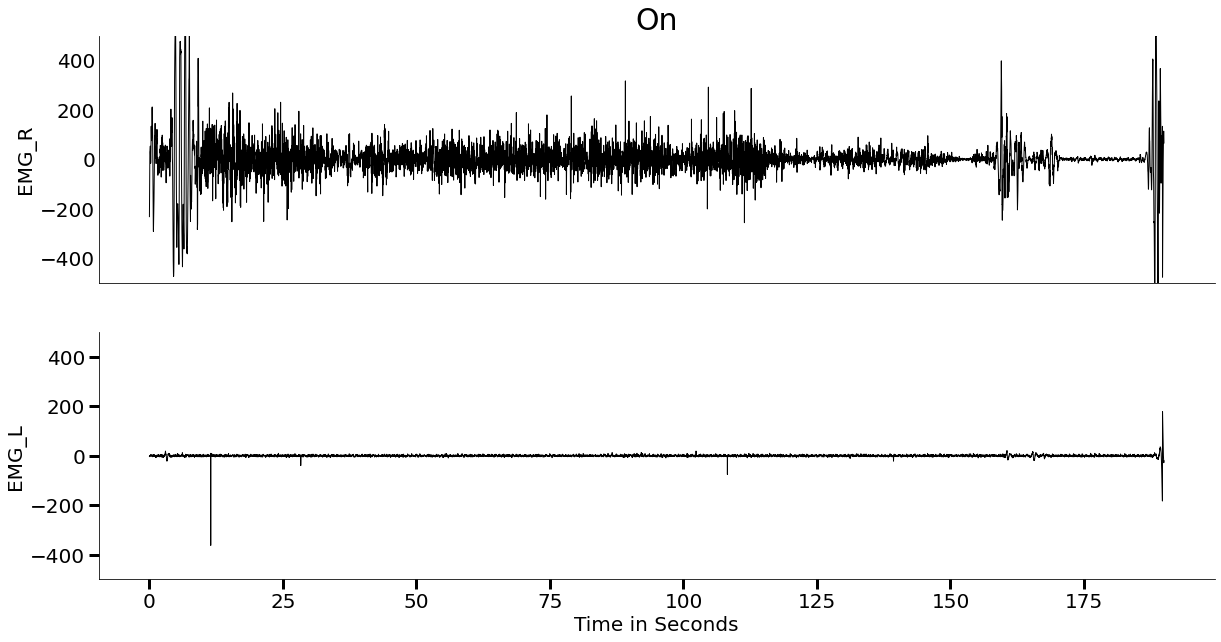

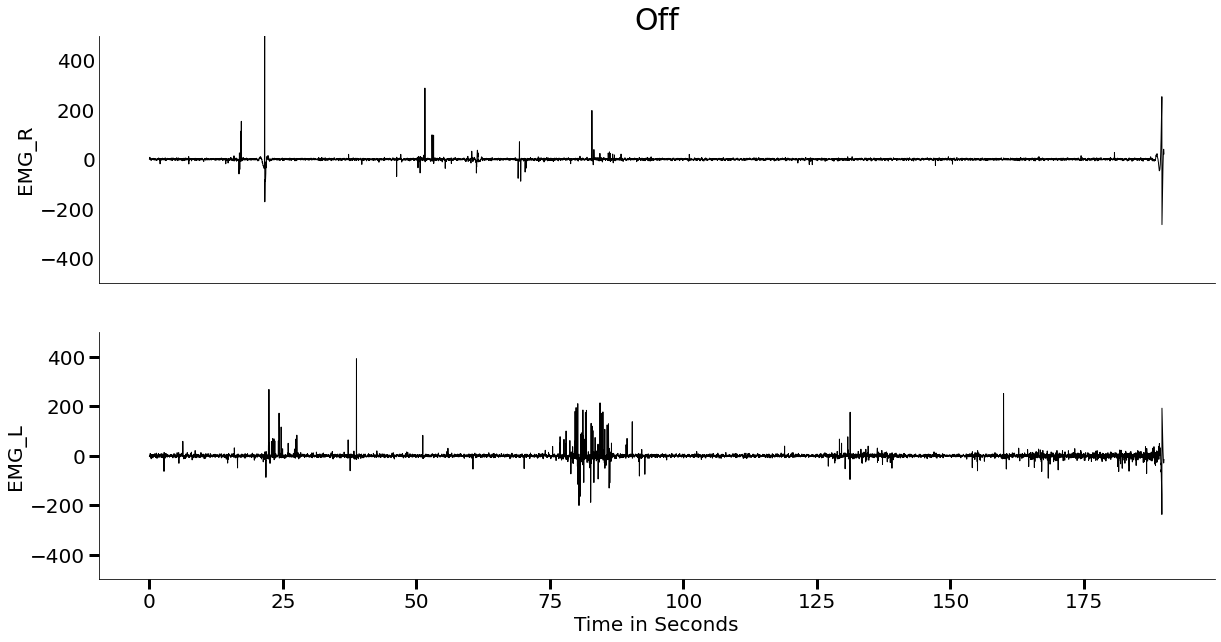

In [198]:
ydiff = 10
fontsize=20
time_lim = -1#int(5*on_s_rate)
step_size=50

fig, ax = plt.subplots(2, 1, figsize=(20, 10), sharex=True, sharey=True)
ax[0].plot(on_t[0:time_lim:step_size], on_data[9, 0:time_lim:step_size], c="black", linewidth=1)
ax[1].plot(on_t[0:time_lim:step_size], on_data[10, 0:time_lim:step_size], c="black", linewidth=1)

#ax.set_yticks([0, 1*ydiff])

ax[1].set_xlabel("Time in Seconds", fontsize=20)
ax[0].set_ylabel(on_labels[9], fontsize=20)
ax[0].tick_params(length=0, width=0, axis="both", labelsize=20)    
ax[1].set_ylabel(on_labels[10], fontsize=20)
ax[1].tick_params(length=10, width=3, axis="both", labelsize=20)    
for ax in ax:
    ax.set_ylim([-500, 500])
#    ax.spines["bottom"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
 #   ax.spines["left"].set_visible(False)
#plt.subplots_adjust(hspace=-0)
plt.title("On", fontsize=30, position=(0.5, 2.2))
#plt.savefig('../../plots/EMG_on.pdf', bbox_inches="tight")
plt.show()


fig, ax = plt.subplots(2, 1, figsize=(20, 10), sharex=True, sharey=True)
ax[0].plot(off_t[0:time_lim:step_size], off_data[9, 0:time_lim:step_size], c="black", linewidth=1)
ax[1].plot(off_t[0:time_lim:step_size], off_data[10, 0:time_lim:step_size], c="black", linewidth=1)

#ax.set_yticks([0, 1*ydiff])

ax[1].set_xlabel("Time in Seconds", fontsize=20)
ax[0].set_ylabel(off_labels[9], fontsize=20)
ax[0].tick_params(length=0, width=0, axis="both", labelsize=20)    
ax[1].set_ylabel(off_labels[10], fontsize=20)
ax[1].tick_params(length=10, width=3, axis="both", labelsize=20)    
for ax in ax:
    ax.set_ylim([-500, 500])
#    ax.spines["bottom"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
 #   ax.spines["left"].set_visible(False)
#plt.subplots_adjust(hspace=-0)
plt.title("Off", fontsize=30, position=(0.5, 2.2))
#plt.savefig('../../plots/EMG_off.pdf', bbox_inches="tight")
plt.show()

# Calc power spectra

In [10]:
####################################
# calculate spectrum and coherence #
####################################
on_f, on_csd = calc_csd(on_data, fs=on_s_rate, nperseg=2*int(on_s_rate))
on_coherence = calc_coherence(on_csd)
off_f, off_csd = calc_csd(off_data, fs=off_s_rate, nperseg=2*int(off_s_rate), axis=-1)
off_coherence = calc_coherence(off_csd)

# Calculate fooof for all voxels

In [11]:
from fooof import FOOOF
fm = FOOOF(peak_width_limits=(1.0, 12.0))

# On

In [12]:
plot_f=45
freq_idx = on_f<=plot_f
freq_idx[0] = False
on_f[freq_idx]

array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ,
       22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5,
       28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. ,
       33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5,
       39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. ,
       44.5, 45. ])

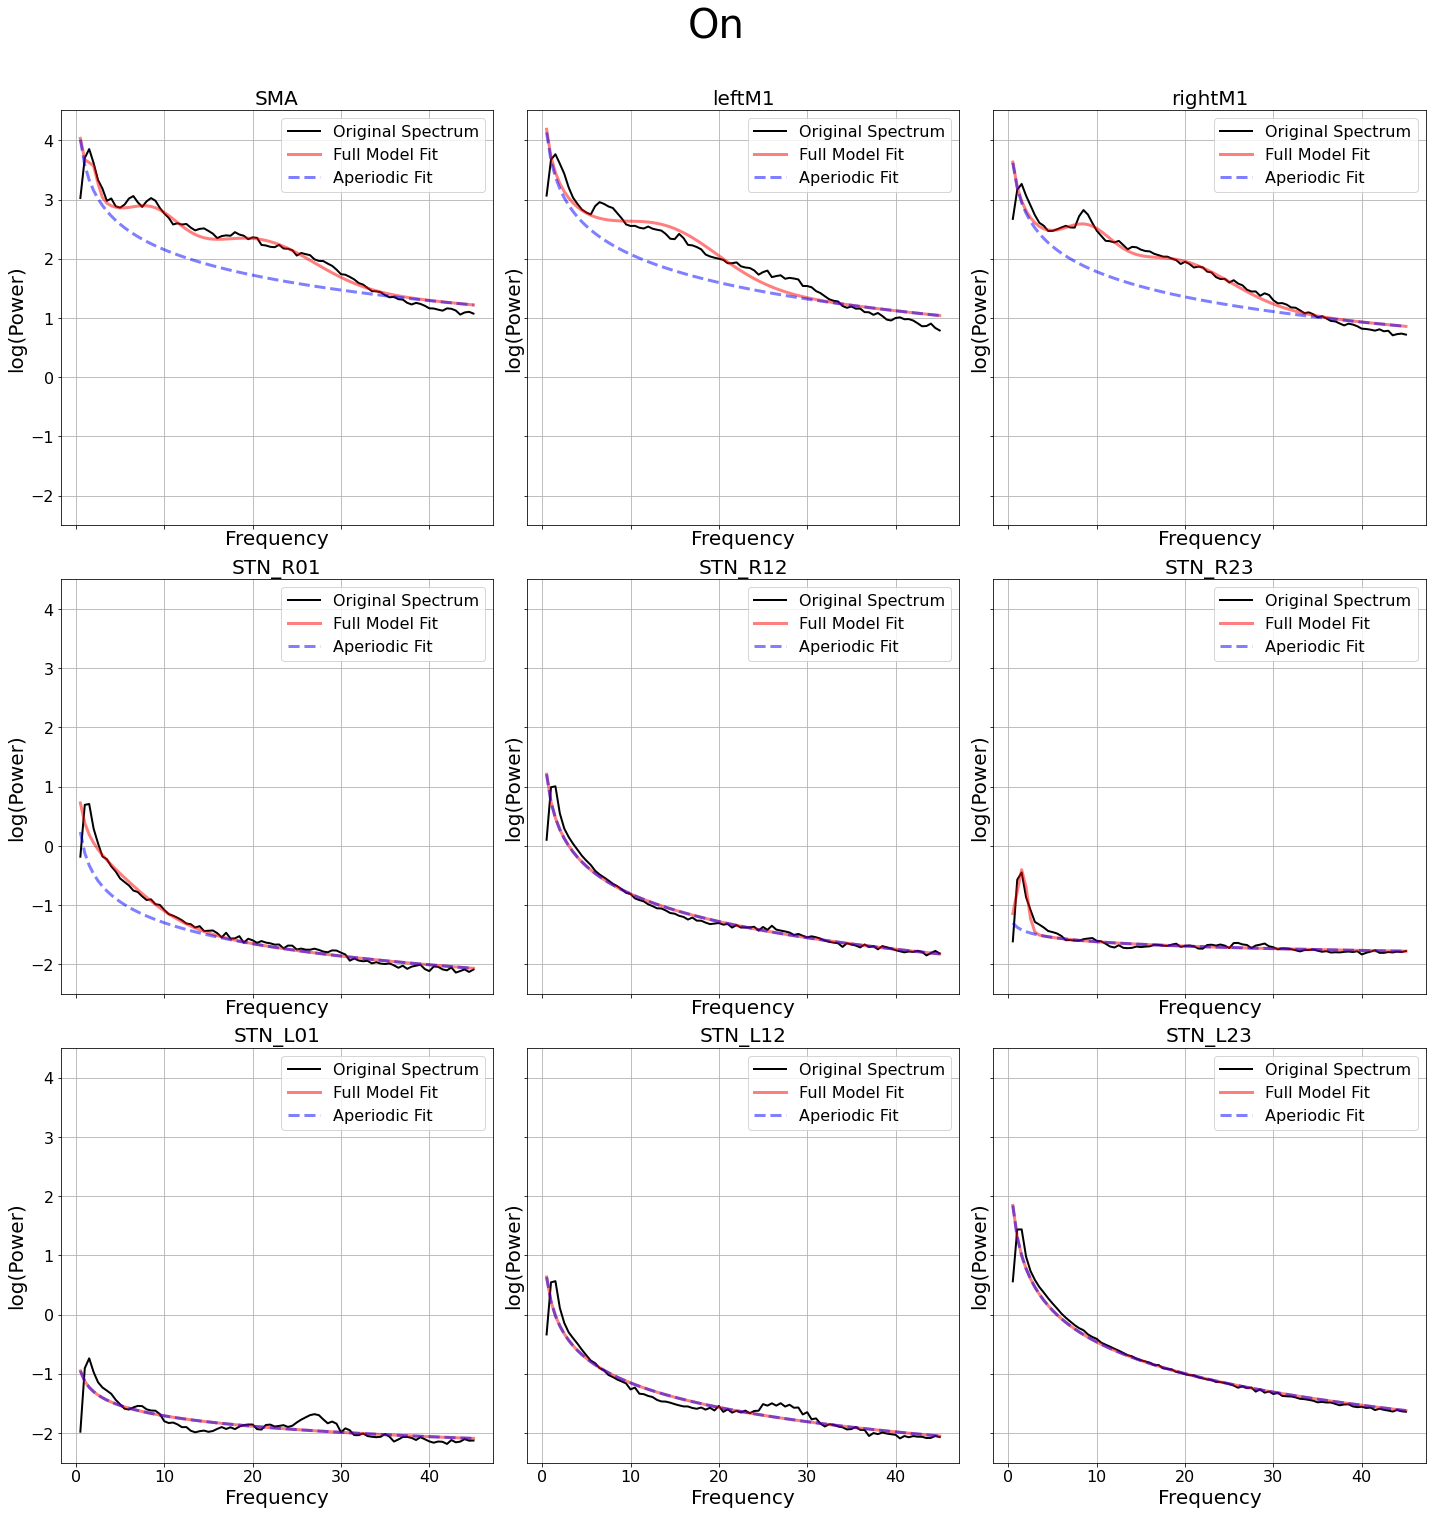

In [13]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20), sharex=True, sharey=True)
ax = ax.flatten()
for i in range(9):
    fm.fit(on_f[freq_idx], np.abs(on_csd[i, i, freq_idx]), [on_f[freq_idx][0], on_f[freq_idx][-1]])
    fm.plot(ax=ax[i])
    ax[i].set_title(on_labels[i], fontsize=20)

plt.suptitle("On", fontsize=40, position=(0.5, 1.05))
plt.tight_layout()
#plt.savefig('../../plots/fooof_spectra_on.pdf', bbox_inches="tight")

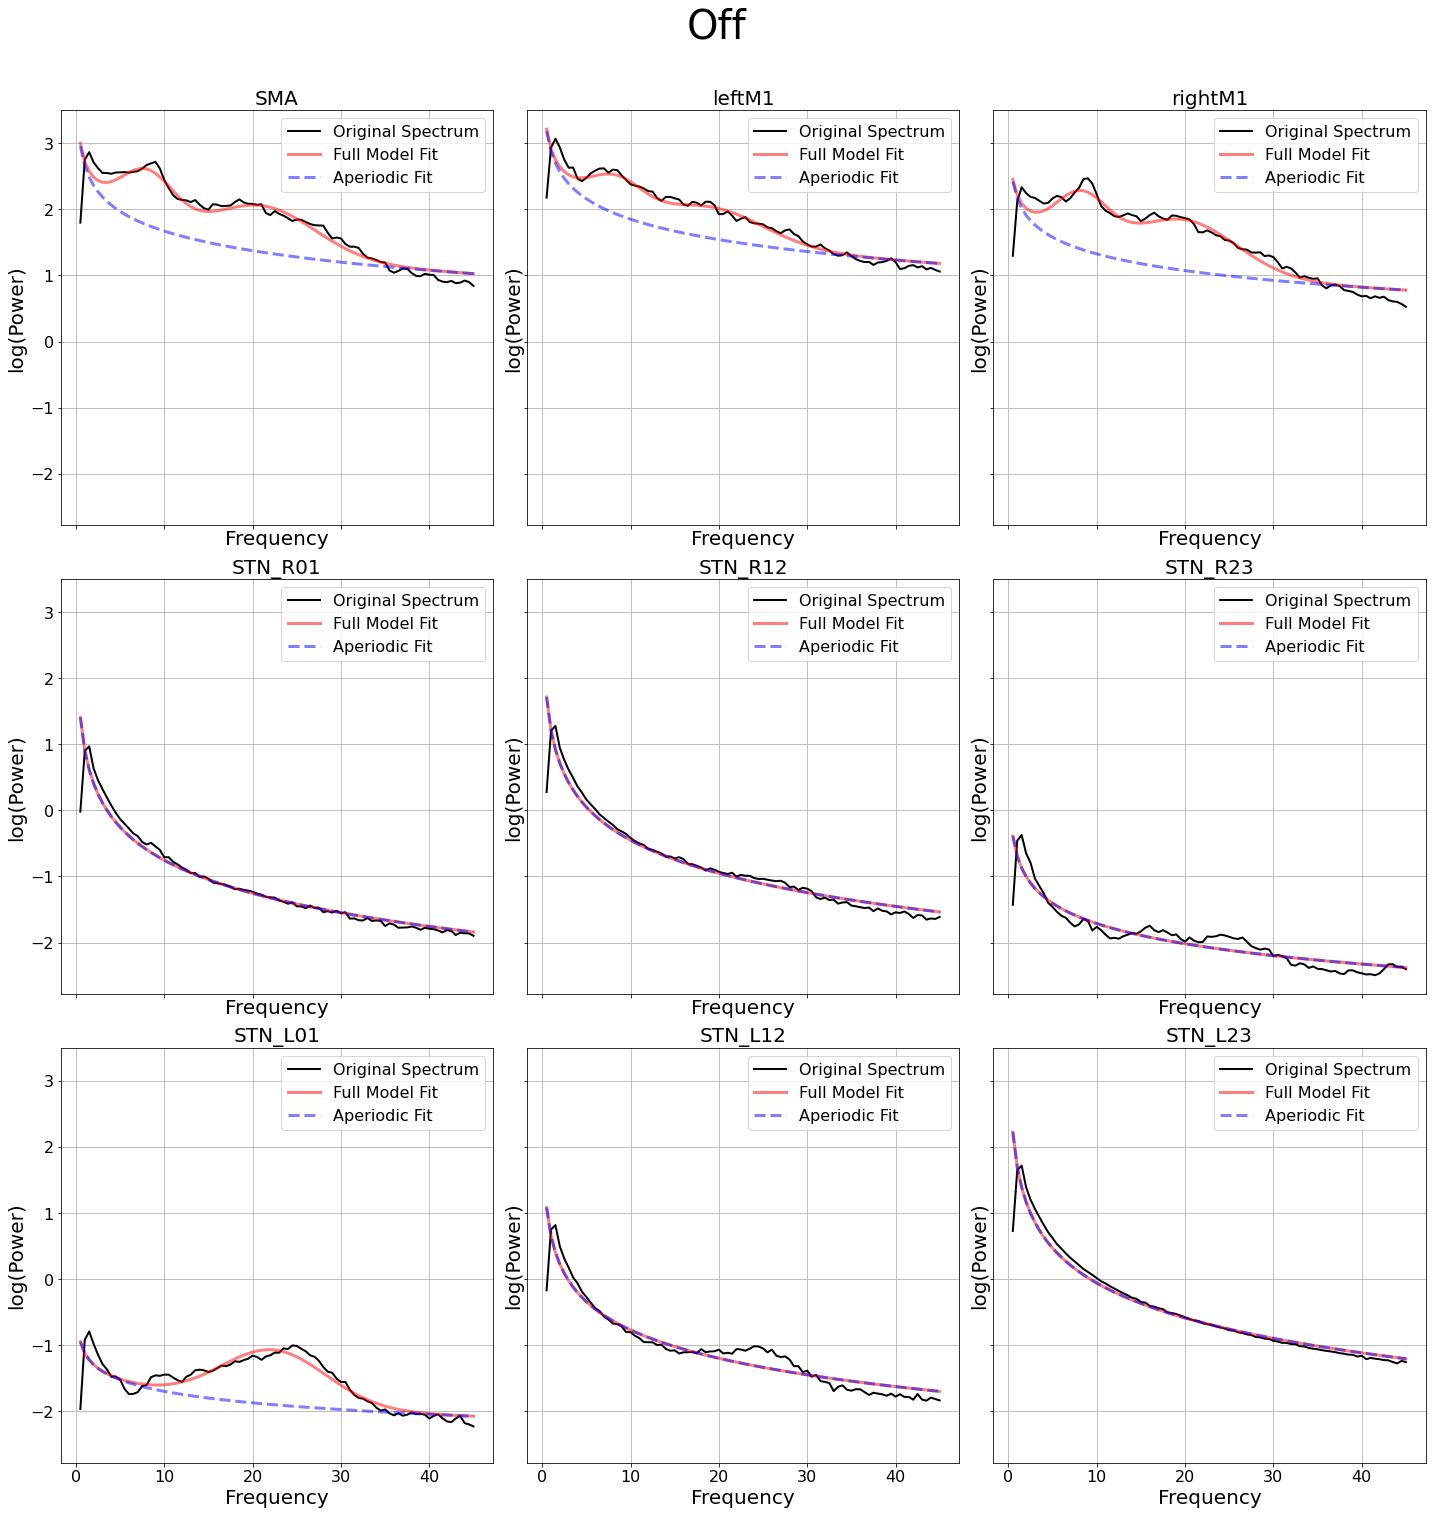

In [19]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20), sharex=True, sharey=True)
ax = ax.flatten()
for i in range(9):
    fm.fit(off_f[freq_idx], np.abs(off_csd[i, i, freq_idx]), [off_f[freq_idx][0], off_f[freq_idx][-1]])
    fm.plot(ax=ax[i])
    ax[i].set_title(off_labels[i], fontsize=20)

plt.suptitle("Off", fontsize=40, position=(0.5, 1.05))
plt.tight_layout()
#plt.savefig('../../plots/fooof_spectra_off.pdf', bbox_inches="tight")

In [39]:
fm.fit(off_f[freq_idx], np.abs(off_csd[i, i, freq_idx]), [off_f[freq_idx][0], off_f[freq_idx][-1]])

In [54]:
from fooof.plts.spectra import plot_spectrum_shading, plot_spectra_shading
from fooof.plts.annotate import plot_annotated_model

In [77]:
off_f[freq_idx][-1]

45.0

[4.00764233 1.72721844]


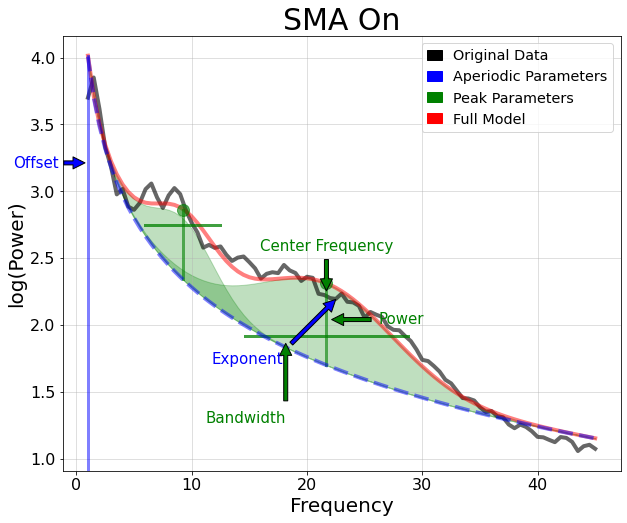

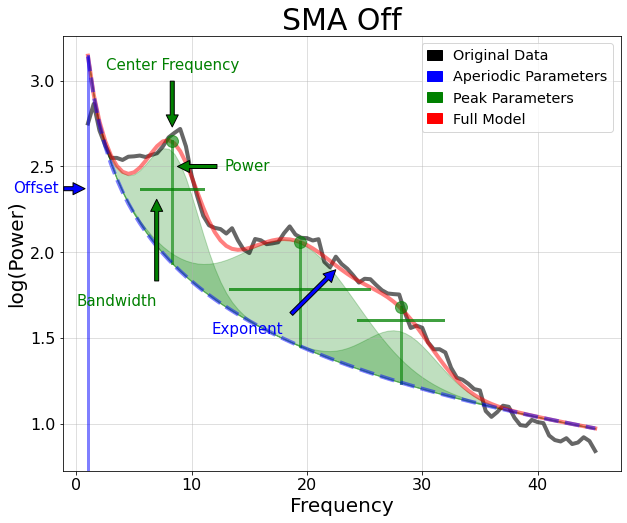

In [84]:
for i in range(1):
    fm.fit(on_f[freq_idx], np.abs(on_csd[i, i, freq_idx]), [1, 45])
    print(fm.aperiodic_params_)
    plot_annotated_model(fm)
    plt.title(on_labels[i] + " On", fontsize=30)
    plt.show()

    fm.fit(off_f[freq_idx], np.abs(off_csd[i, i, freq_idx]), [1, 45])
    plot_annotated_model(fm)
    plt.title(on_labels[i] + " Off", fontsize=30)
    plt.show()



In [92]:
for i in range(9):
    fm.fit(on_f[freq_idx], np.abs(on_csd[i, i, freq_idx]), [1, 45])
    #print("fm.aperiodic_params_")
   # print(fm.aperiodic_params_)
  #  print("fm.peak_params_")
 #   print(fm.peak_params_)
    print("fm.n_peaks_")
    print(fm.n_peaks_)
    print("  ")
    fm.fit(off_f[freq_idx], np.abs(off_csd[i, i, freq_idx]), [1, 45])
    #print("fm.aperiodic_params_")
   # print(fm.aperiodic_params_)
  #  print("fm.peak_params_")
 #   print(fm.peak_params_)
    print("fm.n_peaks_")
    print(fm.n_peaks_)
    print("  ")

fm.n_peaks_
2
  
fm.n_peaks_
3
  
fm.n_peaks_
3
  
fm.n_peaks_
3
  
fm.n_peaks_
3
  
fm.n_peaks_
2
  
fm.n_peaks_
3
  
fm.n_peaks_
1
  
fm.n_peaks_
9
  
fm.n_peaks_
1
  
fm.n_peaks_
2
  
fm.n_peaks_
5
  
fm.n_peaks_
3
  
fm.n_peaks_
2
  
fm.n_peaks_
3
  
fm.n_peaks_
7
  
fm.n_peaks_
0
  
fm.n_peaks_
0
  


In [133]:
for i in range(9):
    fm.fit(on_f[freq_idx], np.abs(on_csd[i, i, freq_idx]), [14, 35])
    # Extract a model parameter with `get_params`
    err = fm.get_params('error')

    # Extract parameters, indicating sub-selections of parameters
    exp = fm.get_params('aperiodic_params', 'exponent')
    cfs = fm.get_params('peak_params', 'CF')
    cfs = np.round(cfs, 2)
    pw = fm.get_params('peak_params', 'PW')
    pw= np.mean(pw)
    pw = np.round(pw, 2)
    # Print out a custom parameter report
    template = ("With an error level of {error:1.2f}, FOOOF fit an exponent "
                "of {exponent:1.2f} and peaks of {cfs} Hz with {pw} power.")
    print(template.format(error=err, exponent=exp,
                          cfs=cfs, pw=pw))
    
    fm.fit(off_f[freq_idx], np.abs(off_csd[i, i, freq_idx]), [14, 35])
    # Extract a model parameter with `get_params`
    err = fm.get_params('error')

    # Extract parameters, indicating sub-selections of parameters
    exp = fm.get_params('aperiodic_params', 'exponent')
    cfs = fm.get_params('peak_params', 'CF')
    cfs = np.round(cfs, 2)
    pw = fm.get_params('peak_params', 'PW')
    pw= np.mean(pw)
    pw = np.round(pw, 2)
    # Print out a custom parameter report
    template = ("With an error level of {error:1.2f}, FOOOF fit an exponent "
                "of {exponent:1.2f} and peaks of {cfs} Hz with {pw} power.")
    print(template.format(error=err, exponent=exp,
                          cfs=cfs, pw=pw))
    print("   ")
    

With an error level of 0.04, FOOOF fit an exponent of 2.78 and peaks of 24.14 Hz with 0.26 power.
With an error level of 0.03, FOOOF fit an exponent of 2.21 and peaks of [19.53 24.95 27.82 30.09] Hz with 0.23 power.
   
With an error level of 0.02, FOOOF fit an exponent of 3.11 and peaks of [15.81 22.6  25.39 28.47] Hz with 0.11 power.
With an error level of 0.01, FOOOF fit an exponent of 2.33 and peaks of [17.41 19.02 21.08 22.88 25.04 28.13 31.54] Hz with 0.13 power.
   
With an error level of 0.02, FOOOF fit an exponent of 3.02 and peaks of [18.16 21.86 25.61 26.45 27.82 29.28] Hz with 0.11 power.
With an error level of 0.02, FOOOF fit an exponent of 2.53 and peaks of [16.62 19.46 23.77 29.07] Hz with 0.19 power.
   
With an error level of 0.02, FOOOF fit an exponent of 1.49 and peaks of [17.01 23.3  27.24 29.49] Hz with 0.07 power.
With an error level of 0.02, FOOOF fit an exponent of 1.86 and peaks of [26.96 29.21 30.23] Hz with 0.05 power.
   
With an error level of 0.02, FOOOF f

In [113]:
template = ("With an error level of {error:1.2f}, FOOOF fit an exponent "
                "of {exponent:1.2f} and peaks of {cfs:.1f} Hz.")
print(template.format(error=err, exponent=exp,
                          cfs=cfs))

With an error level of 0.04, FOOOF fit an exponent of 2.78 and peaks of 24.14 Hz.


In [142]:
fm.get_results()

FOOOFResults(aperiodic_params=array([1.9732939 , 1.96737409]), peak_params=array([[1.72032150e+01, 1.15672401e-02, 1.00000000e+00],
       [2.40000000e+01, 9.48392109e-03, 9.56172845e+00],
       [3.23428529e+01, 9.34545384e-03, 1.00000000e+00]]), r_squared=0.9993045290901652, error=0.005036741146464161, gaussian_params=array([[1.72032150e+01, 9.03671691e-03, 5.00000000e-01],
       [2.40000000e+01, 9.48392109e-03, 4.78086423e+00],
       [3.23428529e+01, 7.76729284e-03, 5.00000000e-01]]))

In [150]:
ap_params, peak_params, r_squared, fit_error, gauss_params = fm.get_results()


In [148]:
gauss_params

array([[1.72032150e+01, 9.03671691e-03, 5.00000000e-01],
       [2.40000000e+01, 9.48392109e-03, 4.78086423e+00],
       [3.23428529e+01, 7.76729284e-03, 5.00000000e-01]])

In [157]:
from fooof.plts.spectra import plot_spectrum, plot_spectra

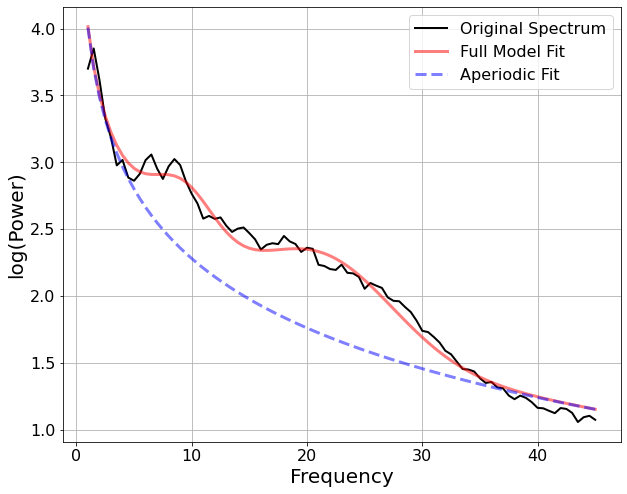

In [165]:
fm.fit(on_f[freq_idx], np.abs(on_csd[i, i, freq_idx]), [1, 45])
fm.plot()

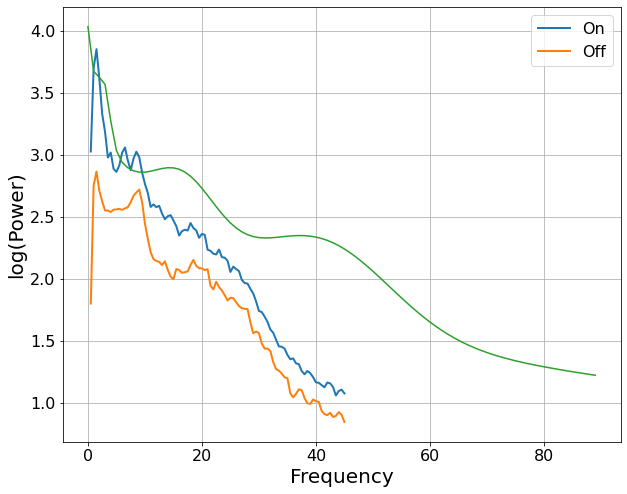

In [188]:
for i in range(1):
    plot_spectra(on_f[freq_idx], [np.abs(on_csd[i, i, freq_idx]), np.abs(off_csd[i, i, freq_idx])], log_freqs=False, log_powers=True, labels=["On", "Off"])
    fm.fit(on_f[freq_idx], np.abs(on_csd[i, i, freq_idx]))
    plt.plot(fm.fooofed_spectrum_)

In [205]:
from fooof import FOOOFGroup
fg=FOOOFGroup()

specs = np.zeros([2, 90])

In [206]:
specs

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [207]:
specs[0] = np.abs(on_csd[i, i, freq_idx])
specs[1] = np.abs(off_csd[i, i, freq_idx])

In [210]:
fg.fit(on_f[freq_idx], specs)

Running FOOOFGroup across 2 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



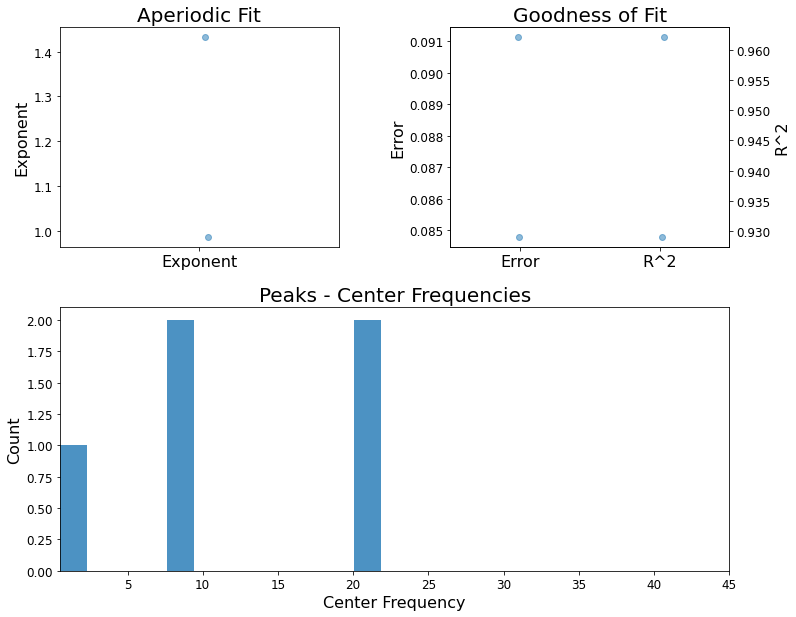

In [211]:
fg.plot()